<a href="https://colab.research.google.com/github/Rezowan-Ferdous/opencv-image-test/blob/master/dipstransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone https://github.com/krishnaik06/Transfer-Learning.git
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 #re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/Train'
valid_path = '/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
import cv2
import os
import matplotlib.pyplot as plt
import dlib
# Load CNN face detector into dlib
# dnnFaceDetector=dlib.cnn_face_detection_model_v1("/content/drive/My Drive/Colab Notebooks/VGG/mmod_human_face_detector.dat")



58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
# paths 
# os.mkdir('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/train_images_crop/')
cropped_train=glob('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/train_images_crop/*')
cropped_test=glob('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/test_images_crop/*')
train_path = '/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/Train'
 # useful for getting number of classes
folders = glob('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/Train/*')
folders_tst = glob('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/Test/*')

# print(folders)
path='/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/'
persons_name=os.listdir(train_path)
# persons_name=['eiko', 'dipto', 'ShamimSir', 'rezowan', 'hasina', 'raju', 'tusher']
print(persons_name)
# for im in persons_name:
#   os.mkdir('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/test_images_crop/'+im+'/')


['eiko', 'dipto', 'ShamimSir', 'rezowan', 'hasina', 'raju', 'tusher']


In [ ]:
# Crop every train and test images and save to train/test crop image folder

images_path=[]
for im in folders:
  print('im:',im)
  for i_ in os.listdir(im):
    print('i_:',i_)
    im_path=im+'/'+i_
    img=cv2.imread(im_path)
    # print(img)
    images_path.append(im_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects=dnnFaceDetector(gray,1)
    left,top,right,bottom=0,0,0,0
    for (i,rect) in enumerate(rects):
      left=rect.rect.left() #x1
      top=rect.rect.top() #y1
      right=rect.rect.right() #x2
      bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    img_path=path+'test_images_crop/'+im.split('/')[-1]+'/'+i_
    plt.imshow(img_crop)
    cv2.imwrite(img_path,img_crop)


    
    # os.mkdir(path+'/train_images_crop/'+im+'/')
    # print(i)
    # os.mkdir(path+'/Images_crop/'+person+'/')

In [ ]:
folders = glob('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/train_images_crop/*')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(cropped_train), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# train our model with our datasets 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/train_images_crop',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/test_images_crop',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Found 143 images belonging to 7 classes.
Found 7 images belonging to 7 classes.
Epoch 1/2
5/5 [==============================] - 4s 730ms/step - loss: 10.2256 - accuracy: 0.3007 - val_loss: 9.4738 - val_accuracy: 0.2857
Epoch 2/2
5/5 [==============================] - 2s 352ms/step - loss: 3.8447 - accuracy: 0.4196 - val_loss: 3.3952 - val_accuracy: 0.4286


In [ ]:
# save the trained model
import os
import tensorflow as tf
from keras.models import load_model

# model.save('/content/drive/My Drive/Colab Notebooks/facefeatures_new_model.h5')


In [ ]:
# Load saved model
classifier_model=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/facefeatures_new_model.h5')

In [ ]:
#  test our model 
import cv2
import matplotlib.pyplot as plt
import dlib
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K
dnnFaceDetector=dlib.cnn_face_detection_model_v1("/content/drive/My Drive/Colab Notebooks/VGG/mmod_human_face_detector.dat")


RuntimeError: ignored

In [ ]:
#  method 1 , using DNN
def plot(img):
  plt.figure(figsize=(10,6))
  plt.imshow(img[:,:,::-1])
  plt.show()
person_rep={0: 'dipto',
 1: 'ShamimSir',
 2: 'Hasina',
 3: 'rezowan',
 4: 'Raju',
 5: 'tusher',
 6: 'eiko'}

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)
path='/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/'
# os.mkdir(path+'Predictions')
print(os.listdir(path+'/Test_Images'))
for img_name in os.listdir(path+'Test_Images/'):
  if img_name=='crop_img.jpg':
    continue
  # Load Image
  img=cv2.imread(path+'/Test_Images/'+img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect Faces
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite(path+'/Test_Images/crop_img.jpg',img_crop)
    
    # Get Embeddings
    crop_img=load_img(path+'/Test_Images/crop_img.jpg',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    # crop_img=preprocess_input(np.array(crop_img.resize((224,224))))
    
    crop_img=preprocess_input(crop_img)
    print('pre processed: ',crop_img)
    # crop_img=tf.convert_to_tensor(crop_img, dtype=tf.float32)
    img_encode=model(crop_img)
    print('img encode: ',img_encode)
   

    # Make Predictions
    embed=K.eval(img_encode)#
    print('embed: ',embed)
    person=classifier_model.predict(embed)
    print(person)
    name=person_rep[np.argmax(person)]
    os.remove(path+'/Test_Images/crop_img.jpg')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite(path+'/Predictions/'+img_name,img)
  plot(img)

['FB_IMG_1593503885607.jpg', 'FB_IMG_1593503690297.jpg', 'FB_IMG_1593503637233.jpg', 'FB_IMG_1593505090744.jpg', 'ShamimSir13.jpg', 'crop_img.jpg']


RuntimeError: ignored

In [ ]:
# #############################
# method 2 using CV2 Cascade 
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
import cv2
from google.colab.patches import cv2_imshow
from io import BytesIO
import json 
import random
import cv2
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions
model=load_model('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/facefeatures_new_model.h5')
face_cascade=cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/haarcascade_frontalface_default.xml')
# print(face_cascade)
def face_extractor(img):
    faces=face_cascade.detectMultiScale(img,1.3,5)
  #   gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # # Detect Faces
  #   faces=dnnFaceDetector(gray,1)
    print(faces)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face=img[y:y+h,x:x+w]
        cv2_imshow(cropped_face)

    return cropped_face
fileimg=cv2.imread('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/Test/ShamimSirtest.jpg')
face=face_extractor(fileimg)
print(fileimg)

In [ ]:
fileimg=cv2.imread('/content/drive/My Drive/Colab Notebooks/Tensorflow-VGG/Transfer-Learning/Datasets/Test/ShamimSirtest.jpg')
face=face_extractor(fileimg)
if type(face) is np.ndarray:
    face=cv2.resize(face,(224,224))
    im=Image.fromarray(face,'RGB')
    print(im)
    img_array=np.array(im)
    img_array=np.expand_dims(img_array,axis=0)
    print(img_array)
    pred=model.predict(img_array)
    print(pred)
    #
    label = decode_predictions(pred)
    print(label)
    # label = label[0][0]
    # # print the classification
    # print('%s (%.2f%%)' % (label[1], label[2]*100))
    # for i in range(len(img_array)):
    #     print("X=%s, Predicted=%s" % (img_array[i], pred[i]))
    name="none matching"
    if (label[0][1]>0.5):
        name='Dipto'
    cv2.putText(fileimg,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
else:
    cv2.putText(fileimg,"no face found",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
from google.colab.patches import cv2_imshow    
cv2_imshow(fileimg)

In [29]:
# ####################################################
# Image Augmentation (Masked Face)
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


datagen=ImageDataGenerator(
    featurewise_center=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.005,
    horizontal_flip=True,
    brightness_range=[0.2,1.0],vertical_flip=False,
    fill_mode='nearest'
)
path='/content/drive/My Drive/Masked Face Detection-Dataset/Test/'


for im in os.listdir('/content/drive/My Drive/Masked Face Detection-Dataset/Test/'):

  
  for di in os.listdir('/content/drive/My Drive/Masked Face Detection-Dataset/Test/'+im):
    # print(di)
    # detector = MTCNN()
    img=load_img(path+im+'/'+di)
    print(img)
    
    x=img_to_array(img)
    # x = detector.detect_faces(x)
    x=x.reshape((1,)+ x.shape)
    # create the detector, using default weights
    
    # detect faces in the image
    
    i=0
    for batch in datagen.flow(x,batch_size=1,
                        save_to_dir='/content/drive/My Drive/Masked Face Detection-Dataset/Test/'+im,
                        save_prefix=im,save_format='jpg'):
                        i+=1
                        print(im)
                        print(di)
                        if i>1:
                          print(i)
                          break
       
      

      
    


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=317x461 at 0x7F2250D0BE10>
dipto
dipto_0_1.jpg
dipto
dipto_0_1.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=346x470 at 0x7F2250D0BDD8>
dipto
dipto_0_2.jpg
dipto
dipto_0_2.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=341x476 at 0x7F2252430EB8>


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


dipto
dipto_0_3.jpg
dipto
dipto_0_3.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=349x480 at 0x7F2252430F60>
dipto
dipto_0_4.jpg
dipto
dipto_0_4.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=352x480 at 0x7F22524302E8>
dipto
dipto_0_5.jpg
dipto
dipto_0_5.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=351x480 at 0x7F2252430FD0>
dipto
dipto_0_6.jpg
dipto
dipto_0_6.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x2560 at 0x7F22524302E8>
eiko
eiko_0_2.jpg
eiko
eiko_0_2.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x2560 at 0x7F2252430E48>
eiko
eiko_0_1.jpg
eiko
eiko_0_1.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x2560 at 0x7F2250D0BE80>
eiko
eiko_0_4.jpg
eiko
eiko_0_4.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x2560 at 0x7F2250CC0828>
eiko
eiko_0_3.jpg
eiko
eiko_0_3.jpg
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x2560 at 0x7F2250CC5278>
eiko
eiko_0_6.

In [8]:
import os
import glob
path='/content/drive/My Drive/Masked Face Detection-Dataset/Test'
# Get Image names stored in "Images" folder
image_path_names=[]
person_names=set()
for file_name in glob.glob(path+'/Images/*_0_*'):
  image_path_names.append(file_name)
  print(file_name)
  person_names.add(image_path_names[-1].split('/')[-1].split('_0_')[0])
print(image_path_names)

/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_1.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_2.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_3.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_4.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_5.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_6.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/eiko_0_2.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/eiko_0_1.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/eiko_0_4.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/eiko_0_3.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/eiko_0_6.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/eiko_0_5.jpg
/content/drive/My Drive/Masked Face Detection-

In [31]:
len(image_path_names)

30

In [32]:
person_names


{'dipto', 'eiko'}

In [33]:
import cv2
import matplotlib.pyplot as plt
# import dlib
# dnnFaceDetector=dlib.cnn_face_detection_model_v1("/content/drive/My Drive/Colab Notebooks/VGG/mmod_human_face_detector.dat")

In [34]:
os.mkdir(path+'/Images_crop/')

In [35]:
# For each person create a separate folder
for person in person_names:
  os.mkdir(path+'/Images_crop/'+person+'/')
  # if not os.path.exists(path+'/Images_crop/'+person+'/'):
  

In [37]:
pip install mtcnn

In [38]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from PIL import Image


for file_name in image_path_names:
  # img=cv2.imread(file_name)
  print(file_name)
  im = Image.open(file_name)
  data=pyplot.imread(file_name)
  detector = MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(data)
  for result in faces:# get coordinates
    x, y, width, height = result['box']
    img_crop= im.crop((x, y, x+width, y+height))
    img_crop.save(path+'/Images_crop/'+file_name.split('/')[-1].split('_0_')[0]+'/'+file_name.split('/')[-1])




/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_1.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_2.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_3.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_4.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_5.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_6.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_347.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_3602.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_3309.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_1743.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_4412.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images/dipto_0_5050.jpg
/content/drive/My Drive

In [ ]:
# Practice testing 
# from PIL import Image
# im = Image.open('/content/drive/My Drive/Masked Face Detection-Dataset/Dipto/Dipto/Dipto_6.jpg')
# print(im)
# data = pyplot.imread('/content/drive/My Drive/Masked Face Detection-Dataset/Dipto/Dipto/Dipto_6.jpg')
# detector = MTCNN()
# # detect faces in the image
# faces = detector.detect_faces(data)
# for result in faces:# get coordinates
#     x, y, width, height = result['box']
#     cropped_image = im.crop((x, y, x+width, y+height))
#     cropped_image.save("Out.jpg")

In [44]:
# Get Image names for testing
test_image_path_names=[]
for file_name in glob.glob(path+'/Images_test/*_*.jpg'):
  test_image_path_names.append(file_name)

In [40]:
len(test_image_path_names)
# print(test_image_path_names)

8

In [41]:
os.mkdir(path+'/Test_Images_crop/')

In [42]:
# Create Separate folder for each person in "Test_Images_crop" folder
for person in person_names:
  print(person)
  os.mkdir(path+'/Test_Images_crop/'+person+'/')

dipto
eiko


In [45]:
print(test_image_path_names)

['/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/eiko_2.jpg', '/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/eiko_3.jpg', '/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/eiko_8.jpg', '/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/dipto_3.jpg', '/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/dipto_9.jpg', '/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/dipto_10.jpg', '/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/dipto_1.jpg', '/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/eiko_6.jpg']


In [46]:
for file_name in test_image_path_names:
  # img=cv2.imread(file_name)
  print(file_name)
  im = Image.open(file_name)
  data=pyplot.imread(file_name)
  detector = MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(data)
  for result in faces:# get coordinates
    x, y, width, height = result['box']
    img_crop= im.crop((x, y, x+width, y+height))
    img_crop.save(path+'/Test_Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1])


/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/eiko_2.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/eiko_3.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/eiko_8.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/dipto_3.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/dipto_9.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/dipto_10.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/dipto_1.jpg
/content/drive/My Drive/Masked Face Detection-Dataset/Test/Images_test/eiko_6.jpg


In [47]:
! pip install gdown

In [48]:
! pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 1.2MB/s 
     |████████████████████████████████| 3.8MB 56.6MB/s 
     |████████████████████████████████| 450kB 26.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f6efa177ab26729e397f55a6c2efb4788bf02d8429a1610ee3054bb3c5917108
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [2]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())

model.add(Activation('softmax'))

In [3]:
# Load VGG Face model weights
model.load_weights('/content/drive/My Drive/Colab Notebooks/vgg_face_weights.h5')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [5]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [9]:
import os
#Prepare Training Data
x_train=[]
y_train=[]
person_folders=os.listdir(path+'/Images_crop/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir(path+'/Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

In [10]:
person_rep

{0: 'dipto', 1: 'eiko'}

In [11]:
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train)
print(y_train)

[[ 2.94810462  0.53559697  1.53858757 ... -1.30026269 -0.4871574
  -0.34755597]
 [ 3.08808613  2.50285244  0.53062731 ... -1.66320217  1.01004362
   1.74066889]
 [ 2.66912389  3.13776135  0.84634674 ... -1.6526053   0.66319793
   1.15931594]
 ...
 [ 0.98488367  2.38241124  2.38241243 ...  0.54123318  1.840523
   3.50028443]
 [ 1.79798734  3.10136056  1.39045584 ... -0.52369034  2.38368559
   3.56179595]
 [ 1.64631712  2.5239222   2.78871489 ...  0.69467682  2.35286665
   5.22219467]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/Test_Images_crop/')
for i,person in enumerate(person_folders):
  image_names=os.listdir(path+'/Test_Images_crop/'+person+'/')
  print(image_name)
  for image_name in image_names:
    img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)
print(y_test)

eiko_0_112.jpg
dipto_1.jpg
[0, 0, 0, 0, 1, 1, 1, 1]


In [13]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [19]:
# Save test and train data for later use
np.save(path+'/train_data',x_train)
np.save(path+'/train_labels',y_train)
np.save(path+'/test_data',x_test)
np.save(path+'/test_labels',y_test)

In [20]:
# Load saved data
x_train=np.load(path+'/train_data.npy')
y_train=np.load(path+'/train_labels.npy')
x_test=np.load(path+'/test_data.npy')
y_test=np.load(path+'/test_labels.npy')

In [16]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=10,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=2,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [17]:
classifier_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Train on 30 samples, validate on 8 samples
Epoch 1/10
30/30 [==============================] - 1s 49ms/sample - loss: 0.9714 - accuracy: 0.4667 - val_loss: 0.7106 - val_accuracy: 0.5000
Epoch 2/10
30/30 [==============================] - 0s 583us/sample - loss: 0.4482 - accuracy: 0.8000 - val_loss: 0.6769 - val_accuracy: 0.5000
Epoch 3/10
30/30 [==============================] - 0s 437us/sample - loss: 0.2583 - accuracy: 0.9333 - val_loss: 0.6082 - val_accuracy: 0.5000
Epoch 4/10
30/30 [==============================] - 0s 420us/sample - loss: 0.3136 - accuracy: 0.9333 - val_loss: 0.6466 - val_accuracy: 0.6250
Epoch 5/10
30/30 [==============================] - 0s 399us/sample - loss: 0.2292 - accuracy: 0.9333 - val_loss: 0.6193 - val_accuracy: 0.6250
Epoch 6/10
30/30 [==============================] - 0s 416us/sample - loss: 0.2184 - accuracy: 0.9667 - val_loss: 0.6412 - val_accuracy: 0.6250
Epoch 7/10
30/30 [==============================] - 0s 384us/sample - loss: 0.2244 - accuracy:

In [21]:
# Save model for later use
tf.keras.models.save_model(classifier_model,path+'/face_vggdemo_model.h5')

In [22]:
# Load saved model
classifier_model=tf.keras.models.load_model(path+'/face_vggdemo_model.h5')

In [23]:
test_images_path=path+'/Test_Images/'
print(test_images_path)

/content/drive/My Drive/Masked Face Detection-Dataset/Test/Test_Images/


In [24]:
def plot(img):
  plt.figure(figsize=(10,6))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [25]:
# Label names for class numbers
person_rep={0: 'dipto', 1: 'eiko'}

In [26]:
os.mkdir(path+'/Predictions')

In [33]:
import dlib
import cv2
import matplotlib.pyplot as plt

dnnFaceDetector=dlib.cnn_face_detection_model_v1("/content/drive/My Drive/Colab Notebooks/VGG/mmod_human_face_detector.dat")

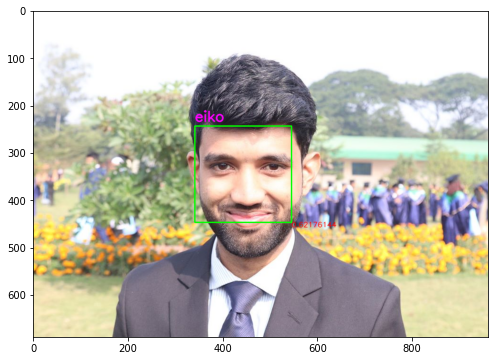

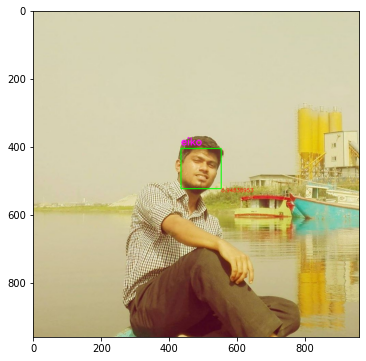

In [34]:
for img_name in os.listdir(path+'/Test_Images/'):
  if img_name=='crop_img.jpg':
    continue
  # Load Image
  img=cv2.imread(path+'/Test_Images/'+img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect Faces
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite(path+'/Test_Images/crop_img.jpg',img_crop)
    
    # Get Embeddings
    crop_img=load_img(path+'/Test_Images/crop_img.jpg',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    crop_img=preprocess_input(crop_img)
    img_encode=vgg_face(crop_img)

    # Make Predictions
    embed=K.eval(img_encode)
    person=classifier_model.predict(embed)
    name=person_rep[np.argmax(person)]
    os.remove(path+'/Test_Images/crop_img.jpg')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite(path+'/Predictions/'+img_name,img)
  plot(img)